### Importing the Dataset

In [1]:
import numpy as np
import pandas as pd

posts = pd.read_csv("../data/Suicide_Detection.csv")
posts.drop(["Unnamed: 0"], axis=1, inplace=True)
posts[["class"]] = (posts[["class"]] == "suicide").astype("int16")

### Exploring the Dataset

In [2]:
posts.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1


In [3]:
posts.describe()

,class
count,232074.000000
mean,0.500000
std,0.500001
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [4]:
# Only select posts with a word count of between 20 and 1000 words
# posts = posts[np.array([20 < len(post.split()) < 1000 for post in posts["text"]])]

In [5]:
post_lengths = [len(post.split()) for post in posts["text"]]

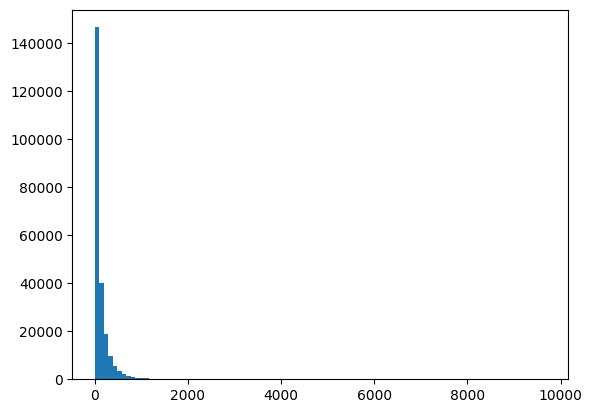

In [6]:
import matplotlib.pyplot as plt

plt.hist(post_lengths, bins=100)
plt.show()

### Preprocessing

#### Splitting the Dataset

In [7]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(posts, test_size=0.1, random_state=42)

In [8]:
strat_train_set, strat_val_set = train_test_split(posts, test_size=1/9, random_state=1)

strat_train_set.head()

,text,class
29879,Psychosis is inevitableMy psychosis is inevita...,1
189631,"There is something really wrong with meSo, I'm...",1
190803,"Hey girl, are you a girl because... I know gir...",0
167196,Did you know that minutes before John F Kenned...,0
62423,The Power to Control TimeWhat superpower would...,1


#### Tokenizing the posts

In [9]:
import spacy

print(spacy.prefer_gpu())

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

nlp.pipe_names

True


['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [10]:
doc = nlp('I was reading the paper.')
print([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

['read', 'paper']


In [11]:
import pickle
from tqdm import tqdm

def preprocess_set(set, directory):
    print(f'Preprocessing {directory} data')

    texts = set.copy()['text']
    labels = set.copy()['class']
    texts = [' '.join(text.split()[:500]) for text in texts]

    docs = (doc for doc in (nlp.pipe(texts)))
    processed_texts = []
    for doc in tqdm(docs, total=len(texts), ncols=80):
        # lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
        lemmas = [token.text for token in doc if not token.is_stop and not token.is_punct]
        processed_texts.append(' '.join(lemmas))
    
    labels = np.array(labels)

    from pathlib import Path
    Path(f"{directory}").mkdir(parents=True, exist_ok=True)

    with open(f"{directory}/texts.pkl", "wb") as fp:
        pickle.dump(processed_texts, fp)
    
    with open(f"{directory}/labels.pkl", "wb") as fp:
        pickle.dump(labels, fp)

    return processed_texts, labels

In [12]:
len(strat_train_set)

206288

In [13]:
preprocess_set(strat_train_set, 'train')
preprocess_set(strat_val_set, 'val')
preprocess_set(strat_test_set, 'test')

print()

Preprocessing train data


100%|██████████████████████████████████| 206288/206288 [07:23<00:00, 465.56it/s]


Preprocessing val data


100%|████████████████████████████████████| 25786/25786 [01:14<00:00, 344.39it/s]


Preprocessing test data


100%|████████████████████████████████████| 23208/23208 [00:43<00:00, 531.11it/s]